In [1]:
from sklearn import datasets
import pandas as pd
import random
import numpy as np
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
x=iris_df[iris_df.columns[:-1]]

In [4]:
def k_means(x,k):    
    random.seed( 10 )
    start=random.sample(list(iris_df.index),k)
    point=[list(x.iloc[j].values)  for j in start]
    check=[[0]*len(x)]
    while True:
        group=[]
        for i in range(x.shape[0]):
            temp=[]
            for j in range(k):
                dist=np.sum((np.array(x.iloc[i].values)-np.array(point[j]))**2)
                temp.append(dist)
            group.append(np.argmin(np.array(temp)))

        if group==check[-1]:
            break
            
        
        ans=[]
        for i in range(k):
            index=np.where(np.array(group)==i)[0]
            ans.append(x.iloc[index].mean().values)
        point=ans
        check.append(group)
    return group

In [5]:
iris_df["test"]=k_means(x,3)
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class,test
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


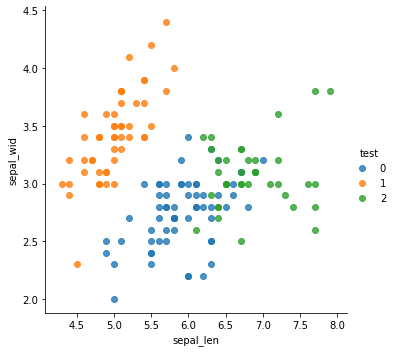

In [7]:
#My result
import seaborn as sns
sns.lmplot(x="sepal_len", y="sepal_wid", data=iris_df, hue="test", fit_reg=False)

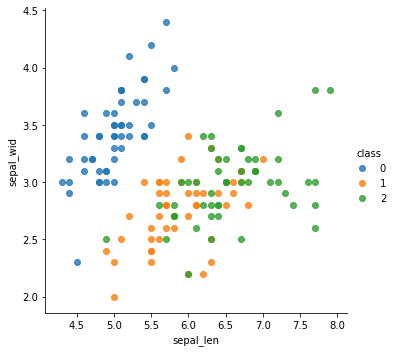

In [8]:
#True result
sns.lmplot(x="sepal_len", y="sepal_wid", data=iris_df, hue="class", fit_reg=False)